In [191]:
import pandas as pd
import seaborn as sns

In [192]:
df = pd.read_csv("train.csv",index_col = 0)
print(df.head())
print(df.info())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [193]:
from sklearn.model_selection import train_test_split 
j = 1
for i in df.Sex:
    if i == "female":
        df.loc[j,["Sex"]] = 1
    else:
        df.loc[j,["Sex"]] = 0
    j += 1

j = 1
for i in df.Embarked:
    if i == 'S':
        df.loc[j,["Embarked"]] = 0
    elif i == 'C':
        df.loc[j,["Embarked"]] = 1
    else:
        df.loc[j,["Embarked"]] = 2
    j += 1
    
df.Age.fillna(df.Age.mean(),inplace = True)
X = df.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = df.loc[:,["Survived"]]

print(df.info())
print(df.Sex.value_counts(dropna = False))
print(df.Embarked.value_counts(dropna = False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 123.5+ KB
None
0    577
1    314
Name: Sex, dtype: int64
0    644
1    168
2     79
Name: Embarked, dtype: int64


In [194]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [195]:
from sklearn.neighbors import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
c = confusion_matrix(y_predict,y_test)
print((c[0][0]+c[1][1])/len(X_test)*100)



80.44692737430168


C:\Users\gunne\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
test = pd.read_csv("test.csv",index_col=0)
# print(test.PassengerId)
print(test.info())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None
             Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexande

In [197]:
j = 892
for i in test.Sex:
    if i == "female":
        test.loc[j,["Sex"]] = 1
    else:
        test.loc[j,["Sex"]] = 0
    j += 1
test.Fare.fillna(test.Fare.mean(),inplace = True)
test.Age.fillna(test.Age.mean(),inplace = True)
j = 892
for i in test.Embarked:
    if i == 'S':
        test.loc[j,["Embarked"]] = 0
    elif i == 'C':
        test.loc[j,["Embarked"]] = 1
    else:
        test.loc[j,["Embarked"]] = 2
    j+=1
print(test.Sex.value_counts()) 
print(test.Embarked.value_counts())
print(test.info())

0    266
1    152
Name: Sex, dtype: int64
0    270
1    102
2     46
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 55.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 46.1 KB
None
(418,)
             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1


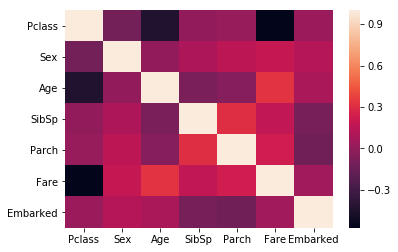

In [204]:
X_testset = test.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
sns.heatmap(X_testset.corr())
print(X_testset.info())
X_testset = s.fit_transform(X_testset)
y_pred = lr.predict(X_testset)
print(y_pred.shape)
dic = {}
dic['PassengerId'] = test.index
dic['Survived'] = y_pred

df = pd.DataFrame(dic)
df.set_index("PassengerId",inplace = True)
print(df.head())
df.to_csv('submission.csv')
